# Introduction

Notebook to aggregate the running of models in the context of traceability between **features** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import feat_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

features = fd.Datasets.read_features_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

MODELS = ['bm25','lsi','lda','wordvector']

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [2]:
exp_vol_intersec_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running Customized W2V model -----
Running W2V model -----
Running ZeroR model -----
Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
major_target_artifact: ['new_awesome_bar']
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 
Evaluating CUST_WORDVECTOR Model ----- 
Evaluating ZERO_R Model ----- 


### Results

In [3]:
evals_df_2.head()

model          ref_name  perc_precision  perc_recall  perc_fscore  \
0   lsi  top_1_cosine_0.0           26.37        70.59        52.86   
1   lsi  top_1_cosine_0.1           26.37        70.59        52.86   
2   lsi  top_1_cosine_0.2           26.37        70.59        52.86   
3   lsi  top_1_cosine_0.3           26.37        70.59        52.86   
4   lsi  top_1_cosine_0.4           26.37        70.59        52.86   

   sim_threshold  top                                     trace_links_df  
0            0.0  1.0  Bug_Number               1248267  1248268  125...  
1            0.1  1.0  Bug_Number               1248267  1248268  125...  
2            0.2  1.0  Bug_Number               1248267  1248268  125...  
3            0.3  1.0  Bug_Number               1248267  1248268  125...  
4            0.4  1.0  Bug_Number               1248267  1248268  125...

In [4]:
evals_df_2_1 = evals_df_2[(evals_df_2.top != 19.0) & (evals_df_2.model != 'cust_wordvector')]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

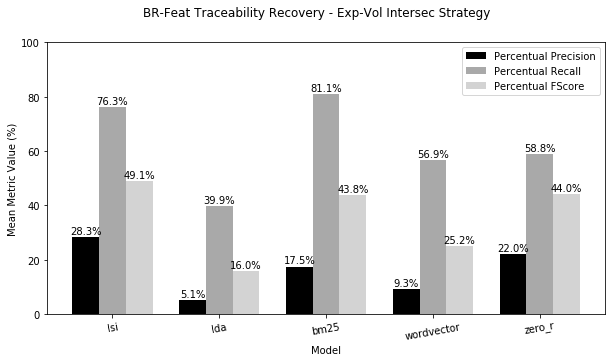

In [5]:
evaluator_2.plot_evaluations_3(evals_df_2_1, title='BR-Feat Traceability Recovery - Exp-Vol Intersec Strategy')

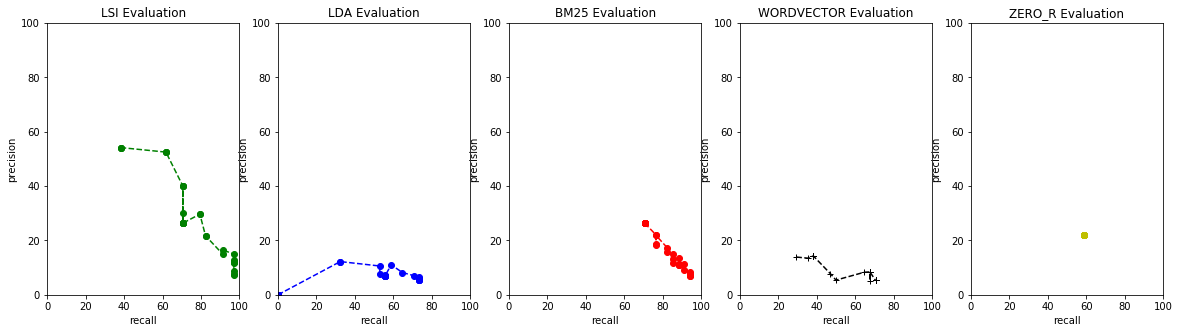

In [6]:
evaluator_2.plot_evaluations_4(evals_df_2_1)

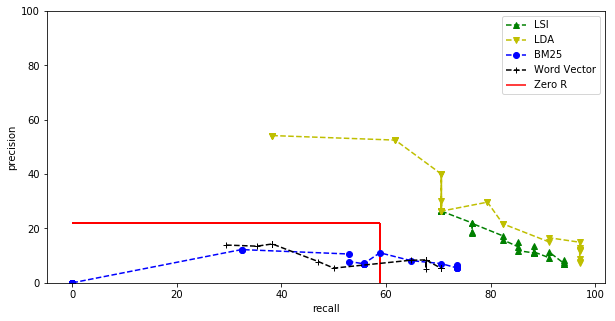

In [7]:
evaluator_2.plot_evaluations_5(evals_df_2_1, models=MODELS)

**Similarity Threshold Variation Analysis**

LSI

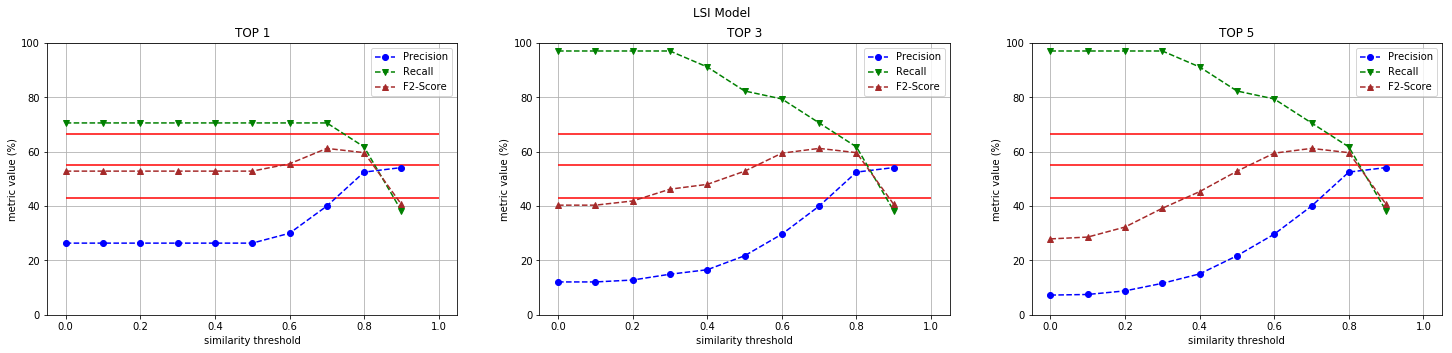

In [8]:
evaluator_2.plot_evaluations_2('LSI Model', evals_df_2, model_name='lsi')

LDA

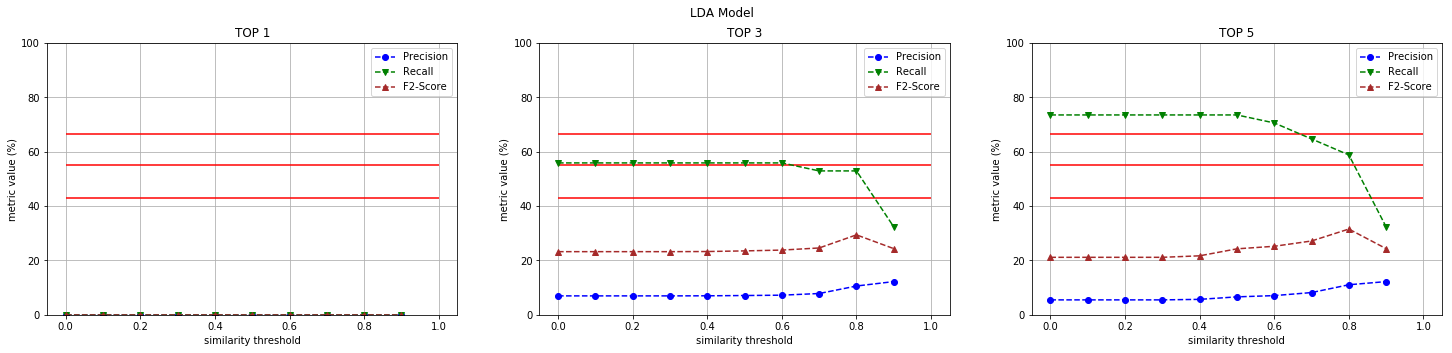

In [9]:
evaluator_2.plot_evaluations_2('LDA Model', evals_df_2, model_name='lda')

BM25

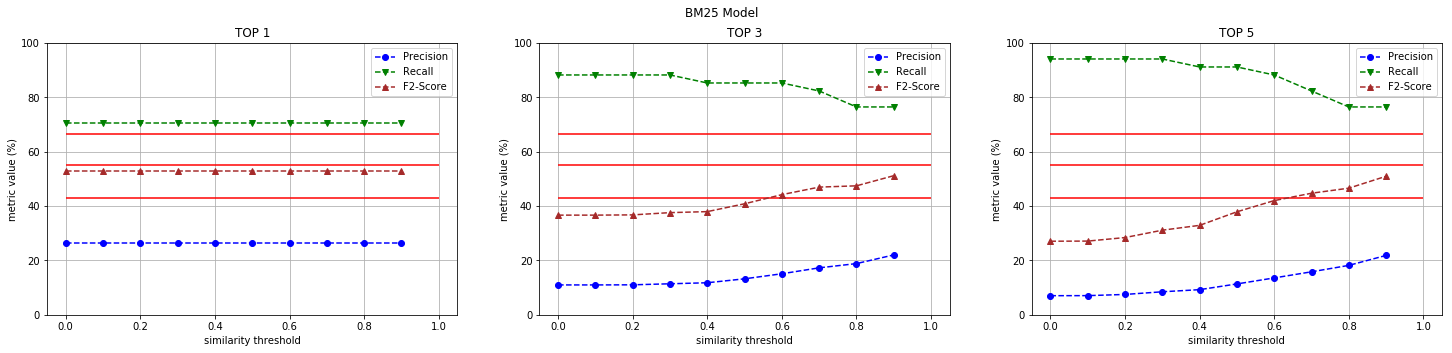

In [10]:
evaluator_2.plot_evaluations_2('BM25 Model', evals_df_2, model_name='bm25')

Word Vector

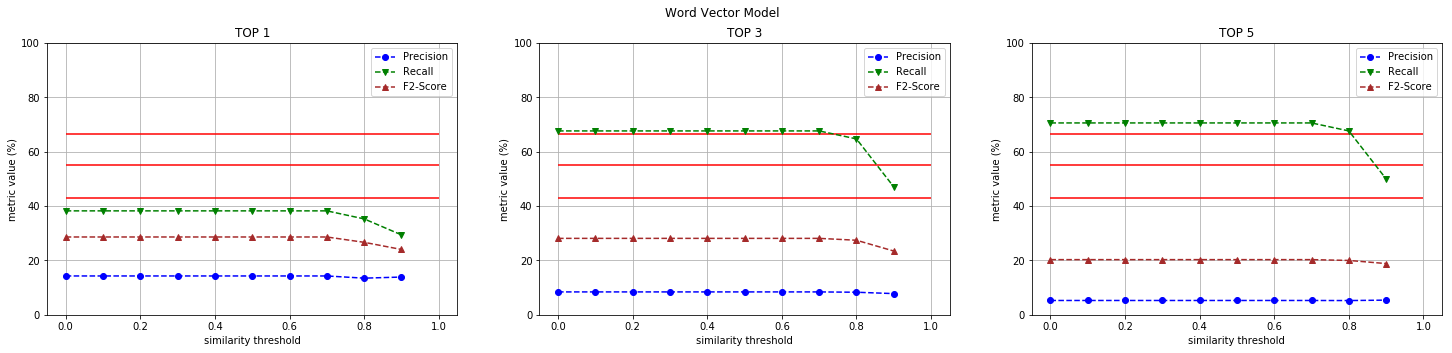

In [11]:
evaluator_2.plot_evaluations_2('Word Vector Model', evals_df_2, model_name='wordvector')

### Approach Example - Assembled Results (Fake)

In [12]:
aux_df = exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().iloc[:,0:3]
aux_df.index = [x for x in range(19)]
aux_df.index.name = 'tc_id'
aux_functions.highlight_df(aux_df)

In [13]:
aux_df_2 = evals_df_2_1[(evals_df_2_1.model == 'lsi') & (evals_df_2_1.ref_name == 'top_3_cosine_0.0')].trace_links_df.values[0].iloc[:,0:3]
aux_df_2.index = [x for x in range(19)]
aux_df_2.index.name = 'tc_id'
aux_functions.highlight_df(aux_df_2)

### Oracle True Traces

In [14]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 34


#### Oracle

In [15]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().head())

#### Number of BRs for Feature

In [16]:
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['feature','num_brs'])
output = exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().apply(lambda row : np.sum(row), axis=1)
df.feature = output.index
df.num_brs = output.values
df = df[df.num_brs != 0]
df

feature  num_brs
0         new_awesome_bar       20
3   browser_customization        2
4              pdf_viewer        1
5            context_menu        3
13         zoom_indicator        1
14    downloads_dropmaker        4
17  indicator_device_perm        3

### ZeroR Evaluation

In [17]:
df = exp_vol_intersec_strat_runner.get_zeror_model().get_major_counts_df()
df.rename(columns={0:'feature',1:'num_BRs'})

feature  num_BRs
0           new_awesome_bar       20
14      downloads_dropmaker        4
17    indicator_device_perm        3
5              context_menu        3
3     browser_customization        2
4                pdf_viewer        1
13           zoom_indicator        1
11         pointer_lock_api        0
16             flac_support        0
15                   webgl2        0
12                 webm_eme        0
9                webgl_comp        0
10  video_and_canvas_render        0
1        windows_child_mode        0
8                 tts_in_rm        0
7            tts_in_desktop        0
6                  w10_comp        0
2       apz_async_scrolling        0
18            flash_support        0

In [18]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_zeror_model().get_sim_matrix())

### Similarity Matrices Analysis

**LDA**

In [19]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix())

**LSI**

In [20]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix())

**BM25**

In [21]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

**Word Vector**

In [22]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.8616428384184254
Std Similarity Value: 0.05845638042856232


### LDA Topics

In [23]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: webgl firefox window compat page web open bar tab taskbar
Topic #1: loud speech read html extens text desktop content page use
Topic #2: element stop default http branch set code info forward field
Topic #3: capabl librari render browser firefox http branch element stop default
Topic #4: custom firefox default browser http branch element stop set appear
Topic #5: element stop default http branch set code info forward field
Topic #6: element stop default http branch set code info forward field
Topic #7: menu context option displayport portion apz new zoom pan gecko
Topic #8: download dropmak notif option display http branch element stop default
Topic #9: element stop default http branch set code info forward field
Topic #10: mous lock pointer movement cursor exampl game api rotat click
Topic #11: child certif mode connect account ssl present activ parent doe
Topic #12: indic zoom devic permiss valu need thi user notif default
Topic #13: reader mode firefox shown loud speech re

### Retrieved Traces - Similarity Threshold 0.0

In [24]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), 
                                                            evals_df=evals_df_2, 
                                                            top_values=[1,3,5], 
                                                            sim_threshs=[0.0],
                                                            models=['lsi','lda','bm25','wordvector'])

retrieved_traces_df[['top','sim_thresh','model',
                     'num_TP','num_FP','num_FN',
                     'precision','recall','fscore']].head(50)

top  sim_thresh       model num_TP num_FP num_FN  precision  recall  fscore
0    1         0.0         lsi     24     67     10      26.37   70.59   52.86
3    1         0.0         lda      0     91     34       0.00    0.00    0.00
6    1         0.0        bm25     24     67     10      26.37   70.59   52.86
9    1         0.0  wordvector     13     78     21      14.29   38.24   28.63
1    3         0.0         lsi     33    240      1      12.09   97.06   40.34
4    3         0.0         lda     19    254     15       6.96   55.88   23.23
7    3         0.0        bm25     30    243      4      10.99   88.24   36.67
10   3         0.0  wordvector     23    250     11       8.42   67.65   28.12
2    5         0.0         lsi     33    422      1       7.25   97.06   27.92
5    5         0.0         lda     25    430      9       5.49   73.53   21.15
8    5         0.0        bm25     32    423      2       7.03   94.12   27.07
11   5         0.0  wordvector     24    431     10       5.27   70.59   20.30

#### Traces Not Captured by Any Technique

In [25]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))

TOP 1 --------------------------
len(not_captured_traces): 7
percent not_captured_traces: 7/34 * 100 : 20.59%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 3 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


TOP 5 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


In [26]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_oracle().loc[:,[br for tc,br in not_captured_traces_t1_inter]])

In [27]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[br for tc,br in not_captured_traces_t1_inter]])

In [28]:
aux_functions.detail_features_br(not_captured_traces_t1_inter, features, bugreports)

feat  \
0        new_awesome_bar   
1  browser_customization   
2         zoom_indicator   
3    downloads_dropmaker   
4        new_awesome_bar   
5             pdf_viewer   
6  browser_customization   

                                                                                                                                                                                                                                                                                                                                                                                                         feat_desc  \
0  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
1                                                                                                                                                                                                                                                                                                        . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
2                                                                                                                                                                                                                                             The Zoom Indicator shows to the user the amount of zoom aplied to the web page. The default value is 100%. This value can go up or dow, depending on the user needs.   
3                                                                                                                                                                                                                                               The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
4  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
5                                                                                                                                                                                                                                                                                                                                                                     Zoom in, Zoom out, Print and Save PDF Files.   
6                                                                                                                                                                                                                                                                                                        . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   

        br  \
0  1352539   
1  1318903   
2  1305195   
3  1432915   
4  1279143   
5  1301056   
6  1357458   

                                                                                                                      br_summary  
0                                                                             Move defaultenginename pref setting into list.json  
1  [Windows 7 and below] Fullscreen window controls not shown with dark themes, close button has broken "red square" hover state  
2                       In private brows

#### Traces Captured by Every Technique

In [29]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%


TOP 3 -----------------------
len(traces_captured_by_all): 18
percent traces_captured_by_all: 18/34 * 100 : 52.94%


TOP 5 -----------------------
len(traces_captured_by_all): 23
percent traces_captured_by_all: 23/34 * 100 : 67.65%


#### True Positives Analysis

In [30]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

In [31]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix())

##### Exclusive Traces

In [32]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP', verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP', verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:


{('new_awesome_bar', 1296366)}



LSI Exclusive TP:


{('downloads_dropmaker', 1292573), ('new_awesome_bar', 1297374)}



LDA Exclusive TP:


set()



WV Exclusive TP:


{('new_awesome_bar', 1297976)}



len(bm25_exc_set): 1
len(lsi_exc_set): 2
len(lda_exc_set): 0
len(wv_exc_set): 1


TOP 3 ------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1432915)}



LSI Exclusive TP:


{('browser_customization', 1318903),
 ('downloads_dropmaker', 1292573),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}



LDA Exclusive TP:


set()



WV Exclusive TP:


set()



len(bm25_exc_set): 1
len(lsi_exc_set): 4
len(lda_exc_set): 0
len(wv_exc_set): 0


TOP 5 -------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1432915)}



LSI Exclusive TP:


set()



LDA Exclusive TP:


set()



WV Exclusive TP:


set()



len(bm25_exc_set): 1
len(lsi_exc_set): 0
len(lda_exc_set): 0
len(wv_exc_set): 0



BM25 LSI LDA WordVector
TOP 1    1   2   0          1
TOP 3    1   4   0          0
TOP 5    1   0   0          0

#### False Positives Analysis

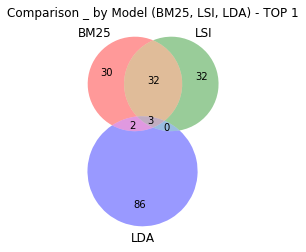

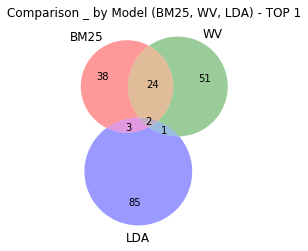

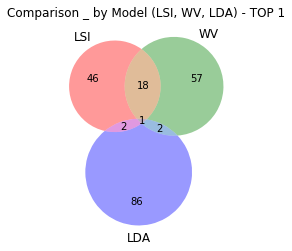

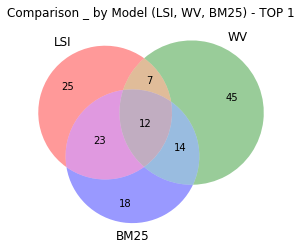

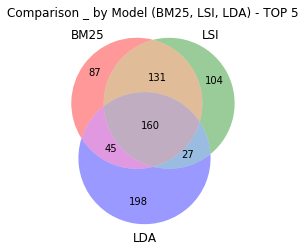

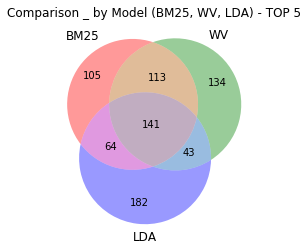

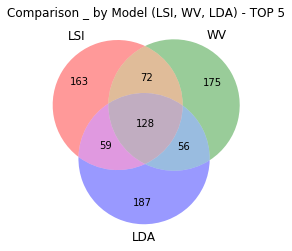

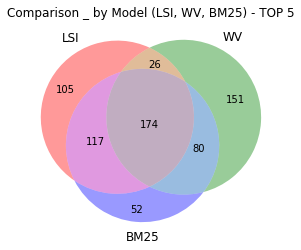

In [33]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FP')

aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, 'FP')

##### Exclusive Traces

In [34]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, traces_type='FP')

TOP 1 ------------------------------


len(bm25_exc_set): 17
len(lsi_exc_set): 25
len(lda_exc_set): 85
len(wv_exc_set): 44


TOP 5 -------------------------------


len(bm25_exc_set): 33
len(lsi_exc_set): 91
len(lda_exc_set): 168
len(wv_exc_set): 121


#### False Negatives Analysis

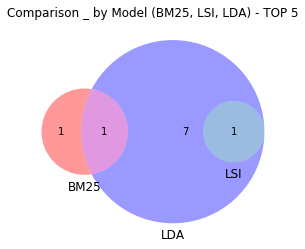

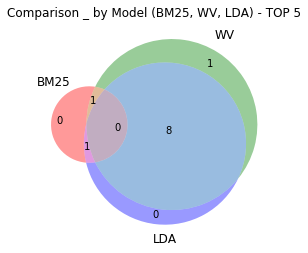

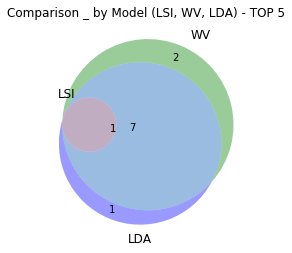

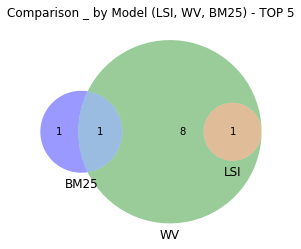

In [35]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FN')

aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, 'False Negatives')

##### Exclusive Traces

In [36]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, traces_type='FN')

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, traces_type='FN')

TOP 1 ------------------------------


len(bm25_exc_set): 0
len(lsi_exc_set): 0
len(lda_exc_set): 11
len(wv_exc_set): 0


TOP 5 -------------------------------


len(bm25_exc_set): 0
len(lsi_exc_set): 0
len(lda_exc_set): 0
len(wv_exc_set): 1


##### **LDA**

In [37]:
aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']]

feat       br  \
0      context_menu  1270983   
1   new_awesome_bar  1279864   
2   new_awesome_bar  1335992   
3   new_awesome_bar  1301421   
4      context_menu  1248267   
5   new_awesome_bar  1337682   
6   new_awesome_bar  1294887   
7   new_awesome_bar  1334844   
8   new_awesome_bar  1353831   
9      context_menu  1299458   
10  new_awesome_bar  1365887   

                                                                                                                                                             br_summary  
0                                                 Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -  
1                                 The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input  
2                                                                                                                       Search with default search engine stops working  
3   browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word  
4                                                                         Right click on bookmark item of "Recently Bookmarked" should show regular places context menu  
5                                          using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).  
6                                                                                                                Middle clicking search results does not open a new tab  
7                                                                                    Address bar uses most recently entered URL, not URL in bar, after using CTRL+ENTER  
8                                                                                  OneOff block in search bar doesn't update text if Customize was opened at least once  
9                                                                  Telemetry data from Search bar is not properly collected when searching in new tab from context menu  
10                                                                                                                Can't open resource:///modules/ from the location bar

In [38]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]])

In [39]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1 - set([1270983,1248267,1299458])]])

##### **LSI**

No exclusive False Negative traces for Top 1 and Top 5

##### **BM25**

No exclusive False Negative traces for Top 1 and Top 5

##### **Word Vector**

In [40]:
aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']]

feat       br  \
0  downloads_dropmaker  1287384   

                                                  br_summary  
0  Incorrect alignment of Summary section in Downloads panel

In [41]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]])

### Retrieved Traces - Similarity Threshold 0.9

In [42]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), 
                                                            evals_df=evals_df_2, 
                                                            top_values=[1,3,5], 
                                                            sim_threshs=[0.9],
                                                            models=['lsi','lda','bm25','wordvector'])

retrieved_traces_df[['top','sim_thresh','model',
                     'num_TP','num_FP','num_FN',
                     'precision','recall','fscore']].head(50)

top  sim_thresh       model num_TP num_FP num_FN  precision  recall  fscore
0    1         0.9         lsi     13     11     21      54.17   38.24   40.62
3    1         0.9         lda      0     32     34       0.00    0.00    0.00
6    1         0.9        bm25     24     67     10      26.37   70.59   52.86
9    1         0.9  wordvector     10     62     24      13.89   29.41   24.04
1    3         0.9         lsi     13     11     21      54.17   38.24   40.62
4    3         0.9         lda     11     79     23      12.22   32.35   24.34
7    3         0.9        bm25     26     92      8      22.03   76.47   51.18
10   3         0.9  wordvector     16    189     18       7.80   47.06   23.46
2    5         0.9         lsi     13     11     21      54.17   38.24   40.62
5    5         0.9         lda     11     79     23      12.22   32.35   24.34
8    5         0.9        bm25     26     93      8      21.85   76.47   50.98
11   5         0.9  wordvector     17    298     17       5.40   50.00   18.85

#### Traces Not Captured by Any Technique

In [43]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t3_inter)

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t5_inter)

TOP 1 --------------------------
len(not_captured_traces): 10
percent not_captured_traces: 10/34 * 100 : 29.41%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1297374),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 3 --------------------------
len(not_captured_traces): 6
percent not_captured_traces: 6/34 * 100 : 17.65%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 1432915),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 5 --------------------------
len(not_captured_traces): 5
percent not_captured_traces: 5/34 * 100 : 14.71%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 143291

In [44]:
df = exp_vol_intersec_strat_runner.get_zeror_model().get_major_counts_df()
df.rename(columns={0:'feature',1:'num_BRs'}, inplace=True)
df[df.num_BRs > 0]

feature  num_BRs
0         new_awesome_bar       20
14    downloads_dropmaker        4
17  indicator_device_perm        3
5            context_menu        3
3   browser_customization        2
4              pdf_viewer        1
13         zoom_indicator        1

In [45]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[1292573,1432915]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[1292573,1432915]]))

In [46]:
aux_functions.detail_features_br(not_captured_traces_t1_inter, features, bugreports).sort_values('feat')

feat  \
2  browser_customization   
9  browser_customization   
4    downloads_dropmaker   
6    downloads_dropmaker   
0        new_awesome_bar   
1        new_awesome_bar   
5        new_awesome_bar   
7        new_awesome_bar   
8             pdf_viewer   
3         zoom_indicator   

                                                                                                                                                                                                                                                                                                                                                                                                         feat_desc  \
2                                                                                                                                                                                                                                                                                                        . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
9                                                                                                                                                                                                                                                                                                        . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
4                                                                                                                                                                                                                                               The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
6                                                                                                                                                                                                                                               The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
0  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
1  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
5  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
7  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
8                                                        

In [47]:
aux_functions.detail_features_br(not_captured_traces_t3_inter, features, bugreports).sort_values('feat')

feat  \
0  browser_customization   
5  browser_customization   
2    downloads_dropmaker   
3    downloads_dropmaker   
4             pdf_viewer   
1         zoom_indicator   

                                                                                                                                                              feat_desc  \
0                                                             . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
5                                                             . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
2    The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
3    The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
4                                                                                                                          Zoom in, Zoom out, Print and Save PDF Files.   
1  The Zoom Indicator shows to the user the amount of zoom aplied to the web page. The default value is 100%. This value can go up or dow, depending on the user needs.   

        br  \
0  1318903   
5  1357458   
2  1432915   
3  1292573   
4  1301056   
1  1305195   

                                                                                                                      br_summary  
0  [Windows 7 and below] Fullscreen window controls not shown with dark themes, close button has broken "red square" hover state  
5                 After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar  
2                                Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode  
3                                                            Broken keyboard interaction with the subview in the Downloads Panel  
4                   [e10s] Link with target="_blank"  to download a file leaves a about:blank window/tab open after the download  
1                       In private browsing mode, zoom level indicator is unreadable when dark developer edition theme is in use

In [48]:
aux_functions.detail_features_br(not_captured_traces_t5_inter, features, bugreports).sort_values('feat')

feat  \
0  browser_customization   
4  browser_customization   
1    downloads_dropmaker   
2    downloads_dropmaker   
3             pdf_viewer   

                                                                                                                                                            feat_desc  \
0                                                           . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
4                                                           . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
1  The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
2  The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
3                                                                                                                        Zoom in, Zoom out, Print and Save PDF Files.   

        br  \
0  1318903   
4  1357458   
1  1432915   
2  1292573   
3  1301056   

                                                                                                                      br_summary  
0  [Windows 7 and below] Fullscreen window controls not shown with dark themes, close button has broken "red square" hover state  
4                 After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar  
1                                Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode  
2                                                            Broken keyboard interaction with the subview in the Downloads Panel  
3                   [e10s] Link with target="_blank"  to download a file leaves a about:blank window/tab open after the download

#### Traces Captured by Every Technique

In [49]:
import pprint

print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t1_inter)

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t3_inter)

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t5_inter)

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%
set()


TOP 3 -----------------------
len(traces_captured_by_all): 5
percent traces_captured_by_all: 5/34 * 100 : 14.71%
{('new_awesome_bar', 1293308),
 ('new_awesome_bar', 1294733),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682)}


TOP 5 -----------------------
len(traces_captured_by_all): 5
percent traces_captured_by_all: 5/34 * 100 : 14.71%
{('new_awesome_bar', 1293308),
 ('new_awesome_bar', 1294733),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682)}


#### True Positives Analysis

In [50]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [51]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP', verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP', verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:


{('context_menu', 1270983),
 ('indicator_device_perm', 1296322),
 ('indicator_device_perm', 1296861),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1296366),
 ('new_awesome_bar', 1311998),
 ('new_awesome_bar', 1339497),
 ('new_awesome_bar', 1357458)}



LSI Exclusive TP:


set()



LDA Exclusive TP:


set()



WV Exclusive TP:


set()



len(bm25_exc_set): 8
len(lsi_exc_set): 0
len(lda_exc_set): 0
len(wv_exc_set): 0


TOP 3 ------------------------------
BM25 Exclusive TP:


{('context_menu', 1270983),
 ('indicator_device_perm', 1296322),
 ('indicator_device_perm', 1296861),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1339497)}



LSI Exclusive TP:


set()



LDA Exclusive TP:


set()



WV Exclusive TP:


{('new_awesome_bar', 1279143), ('new_awesome_bar', 1352539)}



len(bm25_exc_set): 6
len(lsi_exc_set): 0
len(lda_exc_set): 0
len(wv_exc_set): 2


TOP 5 -------------------------------
BM25 Exclusive TP:


{('context_menu', 1270983),
 ('indicator_device_perm', 1296322),
 ('indicator_device_perm', 1296861),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1339497)}



LSI Exclusive TP:


set()



LDA Exclusive TP:


set()



WV Exclusive TP:


{('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1352539),
 ('zoom_indicator', 1305195)}



len(bm25_exc_set): 6
len(lsi_exc_set): 0
len(lda_exc_set): 0
len(wv_exc_set): 3



BM25 LSI LDA WordVector
TOP 1    8   0   0          0
TOP 3    6   0   0          2
TOP 5    6   0   0          3

**BM25 Missed Traces**

In [52]:
brs = aux_functions.detail_features_br(set(oracle_true_traces_inter)-set(bm25_tp_set_t5), features, bugreports).br
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_oracle().loc[:,brs]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,brs]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,brs]))

##### Details of Exclusive Traces

In [53]:
display(aux_functions.detail_features_br(bm25_tp_exc_set_t1, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(bm25_tp_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_tp_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_tp_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

feat       br  \
0           context_menu  1270983   
1        new_awesome_bar  1296366   
2        new_awesome_bar  1357458   
3        new_awesome_bar  1339497   
4        new_awesome_bar  1311998   
5  indicator_device_perm  1296861   
6  indicator_device_perm  1296322   
7  indicator_device_perm  1345687   

                                                                                                                                            br_summary  
0                                Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -  
1                                                                                Ctrl+Click awesomebar entry with "Switch to Tab" doesn't open new tab  
2                                       After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar  
3  firefox tries to load incorrect url if urlbar autocomplete suggests first-two-letters-duplicated hosts when input url contains % encoded components  
4                                                                       [One-off searches] Right click on a result from Awesomebar closes the dropdown  
5                                                       [control center] Don't hardcode colors for the permission status and permission removal button  
6                                                                                         X button is vertically misaligned on the permission dropdown  
7                                                             [Regression] Clicking on audioVideoButton / sharing-icon don't work when typed on urlbar

feat       br  \
0           context_menu  1270983   
1        new_awesome_bar  1297976   
2        new_awesome_bar  1339497   
3  indicator_device_perm  1296861   
4  indicator_device_perm  1296322   
5  indicator_device_perm  1345687   

                                                                                                                                            br_summary  
0                                Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -  
1                                                                         [One-off searches] Screen reader does not read the one-offs searches buttons  
2  firefox tries to load incorrect url if urlbar autocomplete suggests first-two-letters-duplicated hosts when input url contains % encoded components  
3                                                       [control center] Don't hardcode colors for the permission status and permission removal button  
4                                                                                         X button is vertically misaligned on the permission dropdown  
5                                                             [Regression] Clicking on audioVideoButton / sharing-icon don't work when typed on urlbar

feat       br  \
0  new_awesome_bar  1352539   
1  new_awesome_bar  1279143   

                                                                            br_summary  
0                                   Move defaultenginename pref setting into list.json  
1  color indicator missing when "File -> New Container Tab" without any windows opened

feat       br  \
0  new_awesome_bar  1352539   
1   zoom_indicator  1305195   
2  new_awesome_bar  1279143   

                                                                                                 br_summary  
0                                                        Move defaultenginename pref setting into list.json  
1  In private browsing mode, zoom level indicator is unreadable when dark developer edition theme is in use  
2                       color indicator missing when "File -> New Container Tab" without any windows opened

**LSI vs BM25 Similarity Matrices Comparison - TOP 1**

In [54]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t1]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t1]]))

**LSI vs BM25 Similarity Matrices Comparison - TOP 3 and 5**

In [55]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t3]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t3]]))

**BM25 vs WV Similarity Matrices Comparison - TOP 3**

In [56]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in wv_tp_exc_set_t5]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_tp_exc_set_t5]]))

#### False Positives Analysis

In [57]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FP')
bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FP')

#aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(3, bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, 'FP')

##### Exclusive Traces

In [58]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 3 ------------------------------")
bm25_fp_exc_set_t3, lsi_fp_exc_set_t3, lda_fp_exc_set_t3, wv_fp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, traces_type='FP')

TOP 1 ------------------------------


len(bm25_exc_set): 37
len(lsi_exc_set): 0
len(lda_exc_set): 30
len(wv_exc_set): 40


TOP 3 ------------------------------


len(bm25_exc_set): 35
len(lsi_exc_set): 0
len(lda_exc_set): 58
len(wv_exc_set): 139


TOP 5 -------------------------------


len(bm25_exc_set): 28
len(lsi_exc_set): 0
len(lda_exc_set): 51
len(wv_exc_set): 233


**False Positives Analysis**

In [59]:
df_bm25_t1 = aux_functions.detail_features_br(bm25_fp_exc_set_t1, features, bugreports)
df_bm25_t5 = aux_functions.detail_features_br(bm25_fp_exc_set_t5, features, bugreports)

bm25_t1_fp_amount_by_feat = df_bm25_t1.groupby('feat').count()
bm25_t5_fp_amount_by_feat = df_bm25_t5.groupby('feat').count()
bm25_t1_fp_amount_by_feat['model'] = 'bm25'
bm25_t5_fp_amount_by_feat['model'] = 'bm25'


df_lda_t1 = aux_functions.detail_features_br(lda_fp_exc_set_t1, features, bugreports)
df_lda_t5 = aux_functions.detail_features_br(lda_fp_exc_set_t5, features, bugreports)

lda_t1_fp_amount_by_feat = df_lda_t1.groupby('feat').count()
lda_t5_fp_amount_by_feat = df_lda_t5.groupby('feat').count()
lda_t1_fp_amount_by_feat['model'] = 'lda'
lda_t5_fp_amount_by_feat['model'] = 'lda'


df_lsi_t1 = aux_functions.detail_features_br(lsi_fp_exc_set_t1, features, bugreports)
df_lsi_t5 = aux_functions.detail_features_br(lsi_fp_exc_set_t5, features, bugreports)

lsi_t1_fp_amount_by_feat = df_lsi_t1.groupby('feat').count()
lsi_t5_fp_amount_by_feat = df_lsi_t5.groupby('feat').count()
lsi_t1_fp_amount_by_feat['model'] = 'lsi'
lsi_t5_fp_amount_by_feat['model'] = 'lsi'


df_wv_t1 = aux_functions.detail_features_br(wv_fp_exc_set_t1, features, bugreports)
df_wv_t5 = aux_functions.detail_features_br(wv_fp_exc_set_t5, features, bugreports)

wv_t1_fp_amount_by_feat = df_wv_t1.groupby('feat').count()
wv_t5_fp_amount_by_feat = df_wv_t5.groupby('feat').count()
wv_t1_fp_amount_by_feat['model'] = 'wordvector'
wv_t5_fp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [60]:
df_t1 = pd.concat([bm25_t1_fp_amount_by_feat,  lsi_t1_fp_amount_by_feat,
                    lda_t1_fp_amount_by_feat,   wv_t1_fp_amount_by_feat])

df_t1 = df_t1[['feat_desc','model']]
df_t1.reset_index(inplace=True)
df_t1.rename(columns={'feat_desc':'FP_amount','feat':'feature'}, inplace=True)
df_t1 = df_t1.pivot('feature','model','FP_amount')
#df_t1.head(20)

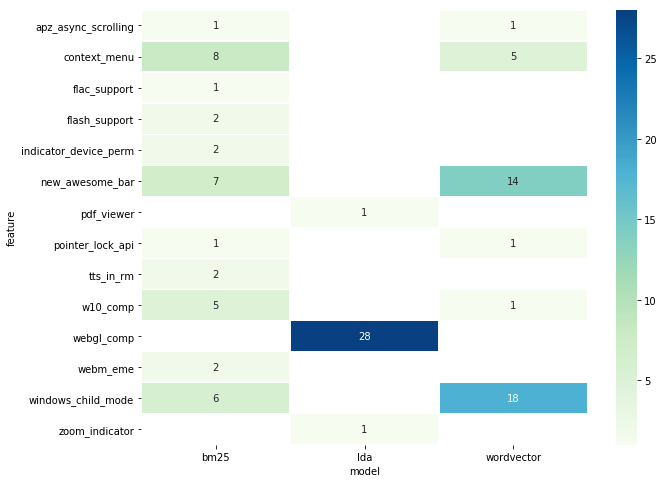

In [61]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t1, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [62]:
df_t5 = pd.concat([bm25_t5_fp_amount_by_feat, lsi_t5_fp_amount_by_feat,
                     lda_t5_fp_amount_by_feat,  wv_t5_fp_amount_by_feat])

df_t5 = df_t5[['feat_desc','model']]
df_t5.reset_index(inplace=True)
df_t5.rename(columns={'feat_desc':'FP_amount','feat':'feature'}, inplace=True)
df_t5 = df_t5.pivot('feature','model','FP_amount')
#df_t5.head(20)

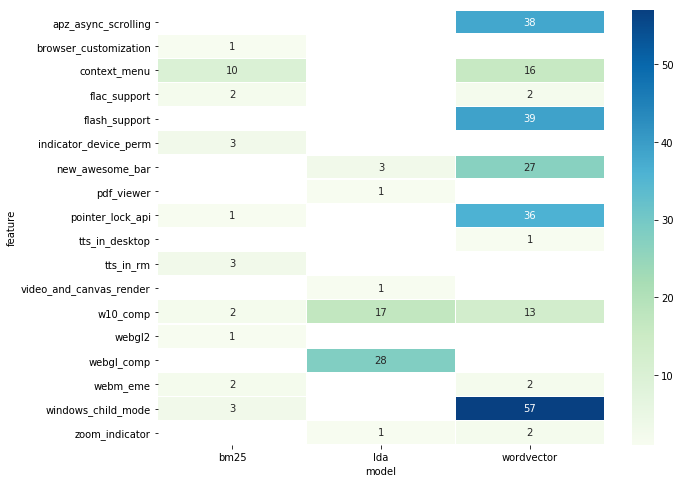

In [63]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t5, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

TOP 1 -----------------------------------


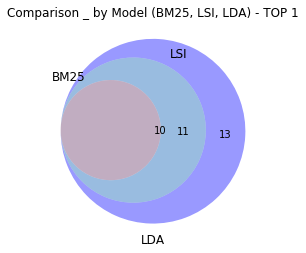

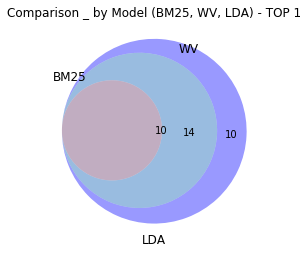

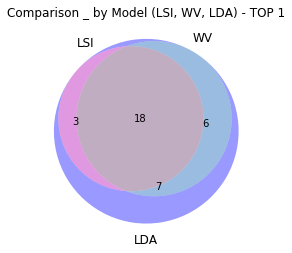

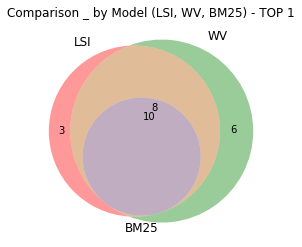



TOP 5 -----------------------------------


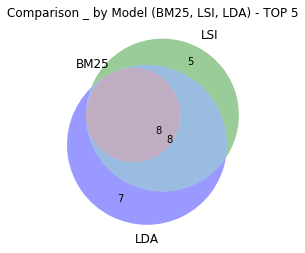

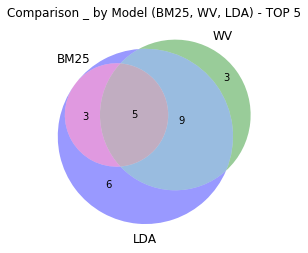

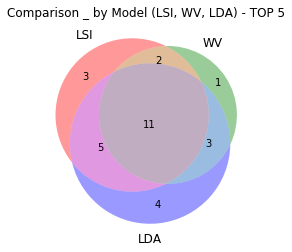

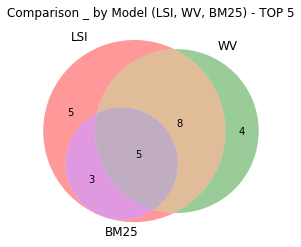

In [64]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FN')
bm25_fn_set_t3, lsi_fn_set_t3, lda_fn_set_t3, wv_fn_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FN')

print("TOP 1 -----------------------------------")
aux_functions.plot_venn_diagrams(1, bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, 'FN')

print("\n\nTOP 5 -----------------------------------")
aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, 'FN')

##### Exclusive Traces

In [65]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, traces_type='FN', verbose=True)

print("\n\nTOP 3 -------------------------------")
bm25_fn_exc_set_t3, lsi_fn_exc_set_t3, lda_fn_exc_set_t3, wv_fn_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_fn_set_t3, lsi_fn_set_t3, lda_fn_set_t3, wv_fn_set_t3, traces_type='FN', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, traces_type='FN', verbose=True)

TOP 1 ------------------------------
BM25 Exclusive FN:


set()



LSI Exclusive FN:


set()



LDA Exclusive FN:


{('context_menu', 1248267),
 ('new_awesome_bar', 1279864),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1301421),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682),
 ('new_awesome_bar', 1365887)}



WV Exclusive FN:


set()



len(bm25_exc_set): 0
len(lsi_exc_set): 0
len(lda_exc_set): 7
len(wv_exc_set): 0


TOP 3 -------------------------------
BM25 Exclusive FN:


set()



LSI Exclusive FN:


{('new_awesome_bar', 1276120),
 ('new_awesome_bar', 1296366),
 ('new_awesome_bar', 1353831)}



LDA Exclusive FN:


{('context_menu', 1248267),
 ('new_awesome_bar', 1279864),
 ('new_awesome_bar', 1301421),
 ('new_awesome_bar', 1365887)}



WV Exclusive FN:


{('new_awesome_bar', 1335992)}



len(bm25_exc_set): 0
len(lsi_exc_set): 3
len(lda_exc_set): 4
len(wv_exc_set): 1


TOP 5 -------------------------------
BM25 Exclusive FN:


set()



LSI Exclusive FN:


{('new_awesome_bar', 1276120),
 ('new_awesome_bar', 1296366),
 ('new_awesome_bar', 1353831)}



LDA Exclusive FN:


{('context_menu', 1248267),
 ('new_awesome_bar', 1279864),
 ('new_awesome_bar', 1301421),
 ('new_awesome_bar', 1365887)}



WV Exclusive FN:


{('new_awesome_bar', 1335992)}



len(bm25_exc_set): 0
len(lsi_exc_set): 3
len(lda_exc_set): 4
len(wv_exc_set): 1


##### Detail False Negatives

In [66]:
display(aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(lda_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

feat       br  \
0  new_awesome_bar  1279864   
1  new_awesome_bar  1301421   
2     context_menu  1248267   
3  new_awesome_bar  1337682   
4  new_awesome_bar  1334844   
5  new_awesome_bar  1294887   
6  new_awesome_bar  1365887   

                                                                                                                                                            br_summary  
0                                The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input  
1  browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word  
2                                                                        Right click on bookmark item of "Recently Bookmarked" should show regular places context menu  
3                                         using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).  
4                                                                                   Address bar uses most recently entered URL, not URL in bar, after using CTRL+ENTER  
5                                                                                                               Middle clicking search results does not open a new tab  
6                                                                                                                Can't open resource:///modules/ from the location bar

feat       br  \
0  new_awesome_bar  1301421   
1  new_awesome_bar  1279864   
2     context_menu  1248267   
3  new_awesome_bar  1365887   

                                                                                                                                                            br_summary  
0  browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word  
1                                The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input  
2                                                                        Right click on bookmark item of "Recently Bookmarked" should show regular places context menu  
3                                                                                                                Can't open resource:///modules/ from the location bar

In [67]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t5]]))

##### Word Vector FN Details

In [68]:
display(aux_functions.detail_features_br(wv_fn_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

feat       br                                       br_summary
0  new_awesome_bar  1335992  Search with default search engine stops working

feat       br                                       br_summary
0  new_awesome_bar  1335992  Search with default search engine stops working

In [69]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t3]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]]))

##### LSI FN Details

In [70]:
display(aux_functions.detail_features_br(lsi_fn_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(lsi_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

feat       br  \
0  new_awesome_bar  1276120   
1  new_awesome_bar  1296366   
2  new_awesome_bar  1353831   

                                                                             br_summary  
0                            Autocomplete suggestions just don't go away after Win+Down  
1                 Ctrl+Click awesomebar entry with "Switch to Tab" doesn't open new tab  
2  OneOff block in search bar doesn't update text if Customize was opened at least once

feat       br  \
0  new_awesome_bar  1276120   
1  new_awesome_bar  1296366   
2  new_awesome_bar  1353831   

                                                                             br_summary  
0                            Autocomplete suggestions just don't go away after Win+Down  
1                 Ctrl+Click awesomebar entry with "Switch to Tab" doesn't open new tab  
2  OneOff block in search bar doesn't update text if Customize was opened at least once

In [71]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in lsi_fn_exc_set_t3]]))

In [72]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_oracle().loc[:,[1353831]])

### Recovery Effort Index (REI)

In [73]:
orc_vol_only_precision = 36.56
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [74]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

model
bm25          1.573069
lda           1.994544
lsi           0.674912
wordvector    4.696553
Name: rei, dtype: float64

### Goodness Scale

In [75]:
aux_functions.calculate_goodness(evals_df_2_1, models=MODELS)

model  precision  recall  fscore    goodness
0        bm25      17.55   81.08   43.79           -
1         lsi      28.32   76.28   49.06  Acceptable
2         lda       5.08   39.90   16.02           -
3  wordvector       9.26   56.87   25.23           -

### Delete Variables

## Volunteers Only Strategy

In [ ]:
vol_strat_runner = feat_br_strat_runner.Feat_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
evals_df_4_1 = evals_df_4[evals_df_4.top != 19.0]
aux_functions.highlight_df( evals_df_4_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4_1, title='BR-Feat Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4_1)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=vol_strat_runner.get_oracle(), evals_df = evals_df_4)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces_vol)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces_t1_vol = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_vol = oracle_true_traces_vol - all_captured_traces_t1_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_vol), len(oracle_true_traces_vol), len(not_captured_traces_t1_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_vol = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_vol = oracle_true_traces_vol - all_captured_traces_t3_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_vol), len(oracle_true_traces_vol), len(not_captured_traces_t3_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_vol = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_vol = oracle_true_traces_vol - all_captured_traces_t5_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_vol), len(oracle_true_traces_vol), len(not_captured_traces_t5_vol)/len(oracle_true_traces_vol)*100))

#### Details of not captured traces

In [ ]:
aux_functions.detail_features_br(not_captured_traces, features=features, bugreports=bugreports)

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_vol = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t1_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_vol = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t3_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_vol = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t5_vol)/len(oracle_true_traces_vol) *100))

### REI Calculation

In [ ]:
evals_df_4_2 = evals_df_4[(evals_df_4.top == 19.0) & (evals_df_4.sim_threshold == 0.0)]
evals_df_4_2.head()

In [ ]:
volunteers_perc_precision = 36.56
lsi_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lsi'].iloc[0,:].perc_precision
lda_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lda'].iloc[0,:].perc_precision 
bm25_rei= volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'bm25'].iloc[0,:].perc_precision 
wv_rei =  volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'wordvector'].iloc[0,:].perc_precision

print('LSI REI: {:2.4}%'.format(lsi_rei))
print('LDA REI: {:2.4}%'.format(lda_rei))
print('BM25 REI: {:2.4}%'.format(bm25_rei))
print('WV REI: {:2.4}%'.format(wv_rei))

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-Feat Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

In [ ]:
evals_df_3_1 = evals_df_3[evals_df_3.top != 19.0]
aux_functions.highlight_df( evals_df_3_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3_1, title='BR-Feat Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3_1)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_strat_runner.get_oracle(), evals_df = evals_df_3)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces = aux_functions.get_oracle_true_positives(exp_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 5 --------------------------')
#from modules.utils import firefox_dataset_p2 as fd
all_captured_traces = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
#aux_functions.detail_features_br(not_captured_traces, features=fd.Datasets.read_features_df(), bugreports=fd.Datasets.read_selected_bugreports_df())
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

### Delete Variables